In [1]:
#Pouya Irani homework 1

In [2]:
##Classification algoritms to predict number of collisions

In [32]:
#Importing neccecary libraries
import numpy as np
from sklearn import preprocessing ,neighbors,svm

from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

#importing the original dataset

df = pd.read_csv("/Users/pouya/Desktop/ML-HW1/train_set.tsv", sep='\t', header=0)
df.drop('min_CPA', axis=1, inplace=True)
df.head()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y,num_collisions
0,0.027068,-62300.591721,-59305.682068,6.705684,247.671970,-59569.480482,41566.912694,1.474570,-56681.475086,-5314.787648,...,-73393.079252,42576.874951,1.607547,-80967.561432,37684.582412,213.175442,-7.837820,41342.567045,33187.606489,3
1,4.023101,-17220.612570,47439.586909,-167.653031,-138.169553,-98139.258988,-19248.698541,2.614451,33573.808959,51374.559396,...,54579.884869,-35144.579226,4.315806,13285.311651,-41245.545752,-196.978758,-82.489078,-2806.112817,-47984.174724,0
2,1.841994,-19900.350438,59030.833595,208.716697,-58.033328,70435.277561,33913.163359,2.492568,-53314.291038,-15227.414024,...,82065.359024,-23468.668544,0.954796,21679.563309,-34471.154448,208.580726,147.651921,78980.509691,6091.533217,0
3,3.621532,-48565.126583,-11986.418570,-113.516305,-218.076997,-60503.694386,-34921.687695,4.941877,66081.722767,-13048.091807,...,60575.192521,42374.513704,4.056282,-31560.842269,36234.825255,-184.415246,-141.978597,-61666.394619,13057.001319,0
4,2.318417,52665.281329,-47498.516869,177.796999,-164.846698,63901.656021,-57916.461362,5.084740,-8541.183540,3543.309665,...,-52711.027260,26128.828499,2.515598,18186.463747,79639.001255,133.007662,-183.966901,63306.445359,17232.196700,0


In [33]:
#Analyzing class distribution
df['num_collisions'].value_counts()


0    538
1    333
2     96
3     30
4      3
Name: num_collisions, dtype: int64

In [34]:
#Defining inputs and output
x = df.drop('num_collisions',axis=1)
y = np.array(df['num_collisions'])

In [35]:
#Balance the dataset using SMOTE oversampling methode

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
over_sampling = SMOTE(sampling_strategy='not majority',k_neighbors=2)
x_smote, y_smote = over_sampling.fit_resample(x, y)

#splitting train and test set

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2,random_state=100)

pd.DataFrame(y_smote).value_counts()

0    538
1    538
2    538
3    538
4    538
dtype: int64

In [7]:
#Grid search to find the best parameters for KNN

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_smote, y_smote)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


In [8]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [9]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 85.06%


In [10]:
#Fitting the KNN classifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train, y_train)

y_test_hat=knn.predict(x_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 82.71%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


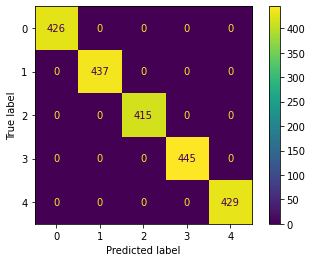

In [11]:
#Vissualising confusion matrix for both train and test set
plot_confusion_matrix(grid,x_train, y_train,values_format='d' )

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


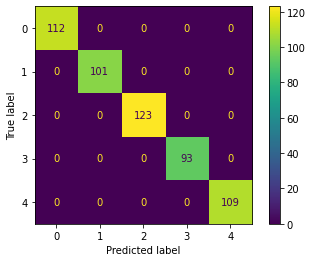

In [12]:
plot_confusion_matrix(grid,x_test, y_test,values_format='d' )


In [36]:
#Executing SVM

clf = svm.SVC(kernel='rbf', degree=3, C=1)
clf.fit(x_train ,y_train)

accuracy = clf.score(x_test , y_test)
f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (rbf Kernel): ', "%.2f" % (accuracy*100))
print('F1 (rbf Kernel): ', "%.2f" % (f1*100))


Accuracy (rbf Kernel):  84.01
F1 (rbf Kernel):  80.33


In [14]:
#comparisson of different kernels 
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)

In [15]:
poly_pred = poly.predict(x_test)

In [16]:
from sklearn.metrics import f1_score
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  81.41
F1 (Polynomial Kernel):  80.33


In [17]:
#Regression

In [18]:
#Importing neccessary packages
import numpy as np
import seaborn as sns
import smogn
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import PolynomialFeatures

In [19]:
#Importing the dataset
df = pd.read_csv("/Users/pouya/Desktop/ML-HW1/train_set.tsv", sep='\t', header=0)
df.drop('num_collisions', axis=1, inplace=True)
df.head()

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y,min_CPA
0,0.027068,-62300.591721,-59305.682068,6.705684,247.671970,-59569.480482,41566.912694,1.474570,-56681.475086,-5314.787648,...,-73393.079252,42576.874951,1.607547,-80967.561432,37684.582412,213.175442,-7.837820,41342.567045,33187.606489,1673.734894
1,4.023101,-17220.612570,47439.586909,-167.653031,-138.169553,-98139.258988,-19248.698541,2.614451,33573.808959,51374.559396,...,54579.884869,-35144.579226,4.315806,13285.311651,-41245.545752,-196.978758,-82.489078,-2806.112817,-47984.174724,51230.547792
2,1.841994,-19900.350438,59030.833595,208.716697,-58.033328,70435.277561,33913.163359,2.492568,-53314.291038,-15227.414024,...,82065.359024,-23468.668544,0.954796,21679.563309,-34471.154448,208.580726,147.651921,78980.509691,6091.533217,18668.177773
3,3.621532,-48565.126583,-11986.418570,-113.516305,-218.076997,-60503.694386,-34921.687695,4.941877,66081.722767,-13048.091807,...,60575.192521,42374.513704,4.056282,-31560.842269,36234.825255,-184.415246,-141.978597,-61666.394619,13057.001319,10159.624794
4,2.318417,52665.281329,-47498.516869,177.796999,-164.846698,63901.656021,-57916.461362,5.084740,-8541.183540,3543.309665,...,-52711.027260,26128.828499,2.515598,18186.463747,79639.001255,133.007662,-183.966901,63306.445359,17232.196700,22110.623878


In [20]:
#Cleaning the dataset to have a Guassian distribution
cleaned = smogn.smoter(data=df, y= 'min_CPA')

r_index: 100%|#################################| 47/47 [00:00<00:00, 403.65it/s]


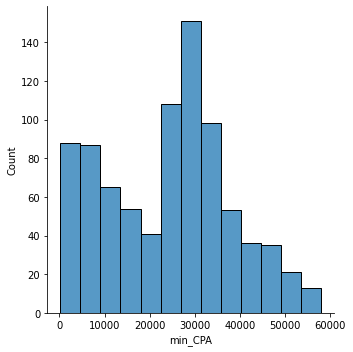

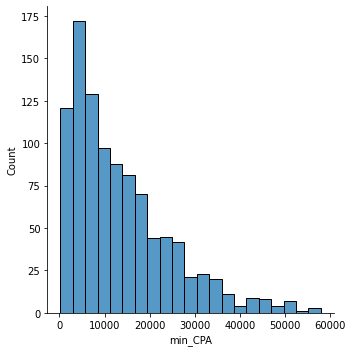

In [21]:
#Comparing the original dataset vs cleaned one
sns.displot(cleaned.min_CPA)
sns.displot(df.min_CPA)

In [22]:
X = cleaned.drop('min_CPA', axis=1)
y = cleaned['min_CPA']

In [23]:
#Defining the train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2500)


In [24]:
#Ddefining the models
reg_rf = RandomForestRegressor(random_state=1)
reg_lr = LinearRegression()

reg_rf.fit(X_train, y_train)
reg_lr.fit(X_train, y_train)

LinearRegression()

In [25]:
#fitting models
reg_v = VotingRegressor([("rf", reg_rf), ("lr", reg_lr)])
reg_v.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [26]:
#Fitting the polynominal regression as a third model
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
reg_poly = LinearRegression()
reg_poly.fit(X_poly, y_train)

LinearRegression()

In [27]:
#Defining the test sets
pred_rf = reg_rf.predict(X_test)
pred_lr = reg_lr.predict(X_test)
pred_v = reg_v.predict(X_test)
pred_poly = reg_poly.predict(poly.fit_transform(X_test))

In [28]:
#Visualising the results

print("RF Mean squared error: %.2f" % mean_squared_error(y_test, pred_rf))
print("RF Regression score: %.2f \n" % r2_score(y_test, pred_rf))

print("LR Mean squared error: %.2f" % mean_squared_error(y_test, pred_lr))
print("LR Regression score: %.2f \n" % r2_score(y_test, pred_lr))

print("V Mean squared error: %.2f" % mean_squared_error(y_test, pred_v))
print("V Regression score: %.2f \n" % r2_score(y_test, pred_v))

print("poly Mean squared error: %.2f" % mean_squared_error(y_test, pred_v))
print("poly Regression score: %.2f" % r2_score(y_test, pred_v))

RF Mean squared error: 106449515.89
RF Regression score: 0.41 

LR Mean squared error: 139215614.72
LR Regression score: 0.23 

V Mean squared error: 115438543.74
V Regression score: 0.36 

poly Mean squared error: 115438543.74
poly Regression score: 0.36


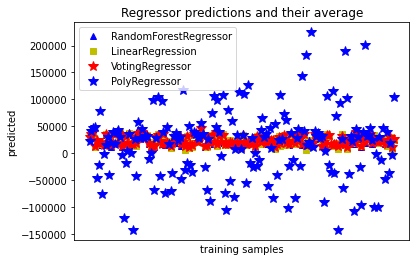

In [29]:
#Demonstrating the results in a figure
plt.figure()

plt.plot(pred_rf, "b^", label="RandomForestRegressor")
plt.plot(pred_lr, "ys", label="LinearRegression")
plt.plot(pred_v, "r*", ms=10, label="VotingRegressor")
plt.plot(pred_poly, "b*", ms=10, label="PolyRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()